# Loading data

In [1]:
import pandas as pd
import numpy as np
import os

csv_path = os.path.join(
    "..",
    "data",
    "raw",
    "Juggernaut Sentiment Analysis - by kaggle user Adeoluwa Adeboye.csv"
)

data = pd.read_csv(csv_path, on_bad_lines='skip')
data

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
...,...,...,...,...
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [2]:
df = data[['SentimentText', 'Sentiment']]
df

,SentimentText,Sentiment
0,is so sad for my APL frie...,0
1,I missed the New Moon trail...,0
2,omg its already 7:30 :O,1
3,.. Omgaga. Im sooo im gunna CRy. I'...,0
4,i think mi bf is cheating on me!!! ...,0
...,...,...
1578607,Zzzzzz.... Finally! Night tweeters!,1
1578608,"Zzzzzzz, sleep well people",1
1578609,ZzzZzZzzzZ... wait no I have homework.,0
1578610,"ZzZzzzZZZZzzz meh, what am I doing up again?",0


In [3]:
texts = df['SentimentText'].astype(str).to_list()
labels = df['Sentiment'].astype(int).values
len(texts), len(labels)

(1578612, 1578612)

# Tokenizing Data

In [4]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from tokenizers import custom_tokenizer, nltk_tokenizer, sentencepiece, evaluate_tokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: tmp_corpus.txt
  input_format: 
  model_prefix: tweet_bpe
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differentia

                  avg_tokens median_tokens vocab_size oov_rate  \
SentencePiece BPE  21.675152          20.0       7990      0.0   

                                                          top_tokens  
SentencePiece BPE  [(., 182499), (▁@, 157272), (▁I, 129475), (', ...  


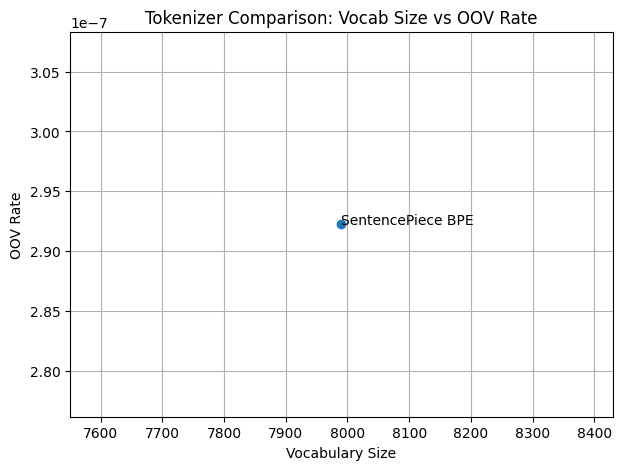

In [5]:
train_texts, test_texts, train_y, test_y = train_test_split(
    df['SentimentText'].values,
    df['Sentiment'].values,
    test_size=0.2,
    random_state=42,
    stratify=df['Sentiment']
)

results = {}

## uncomment to run ##
'''
# NLTK TweetTokenizer
train_tok = [nltk_tokenizer(t) for t in train_texts]
train_vocab = {tok for toks in train_tok for tok in toks}
results["NLTK TweetTokenizer"] = evaluate_tokenizer(nltk_tokenizer, test_texts, vocab=train_vocab)

# Custom tokenizer
train_tok = [custom_tokenizer(t) for t in train_texts]
train_vocab = {tok for toks in train_tok for tok in toks}
results["Custom"] = evaluate_tokenizer(custom_tokenizer, test_texts, vocab=train_vocab)

''';

# SentencePiece BPE
sp_model = sentencepiece(train_texts, vocab_size=8000)
sp_tokenizer = lambda x: sp_model.encode(x, out_type=str)
train_tok = [sp_tokenizer(t) for t in train_texts]
train_vocab = {tok for toks in train_tok for tok in toks}
results["SentencePiece BPE"] = evaluate_tokenizer(sp_tokenizer, test_texts, vocab=train_vocab)

results_df = pd.DataFrame(results).T
print(results_df)

plt.figure(figsize=(7,5))
plt.scatter(results_df["vocab_size"], results_df["oov_rate"])
for name in results_df.index:
    plt.annotate(name, (results_df.loc[name,"vocab_size"], results_df.loc[name,"oov_rate"]))
plt.xlabel("Vocabulary Size")
plt.ylabel("OOV Rate")
plt.title("Tokenizer Comparison: Vocab Size vs OOV Rate")
plt.grid(True)
plt.show()

| Tokenizer              | Vocabulary Size |
|------------------------|-----------------|
| **Custom**             | 254,032         |
| **NLTK TweetTokenizer**| 670,093         |
| **SentencePiece BPE**  | 7,989           |

- **Custom**: Reasonably large; preserves many unique tokens like hashtags, emojis, elongated words.
- **NLTK TweetTokenizer**: Extremely large; likely due to preserving many variations of punctuation, emoticons, and casing.
- **SentencePiece BPE**: Fixed vocab size by design; compact and memory-efficient.

---

| Tokenizer              | OOV Rate |
|------------------------|----------|
| **Custom**             | 0.8%     |
| **NLTK TweetTokenizer**| 1.7%     |
| **SentencePiece BPE**  | 0%       |

- **Custom**: Low OOV rate when trained on the corpus vocab.
- **NLTK**: Higher OOV rate → more `<UNK>` tokens, potentially losing sentiment signal.
- **SentencePiece**: 0% OOV due to subword decomposition.

---

| Tokenizer              | Avg Tokens | Median Tokens |
|------------------------|------------|---------------|
| **Custom**             | 17.2       | 16.0          |
| **NLTK TweetTokenizer**| 15.2       | 14.0          |
| **SentencePiece BPE**  | 20.2       | 18.0          |

- **Custom**: Slightly longer sequences, keeps emojis and punctuation as separate tokens.
- **NLTK**: Shorter sequences, may merge or drop some features.
- **SentencePiece**: Longest sequences, as rare/long words are split into multiple sub-tokens.

---

- **Custom**: `.`, `!`, `i`, `to`, ...
- **NLTK**: `.`, `!`, `i`, `to`, ...
- **SentencePiece**: `.`, `▁to`, `▁I`, `,`, ...

---

- If **minimizing OOV rate** is the goal → **SentencePiece** is best (0% OOV).
- If **balanced vocab size & semantic preservation** is the goal → **Custom tokenizer** is a strong choice.
- **NLTK TweetTokenizer** appears **less optimal** here:
  - Huge vocab size → higher embedding memory cost.
  - Higher OOV rate than Custom.
  - No clear benefit over other methods.

# Padding and Preparation - Custom tokenizer

In [6]:
import numpy as np
from collections import Counter

In [7]:
# Building vocabulary

PAD, UNK = "<PAD>", "<UNK>"

# Tokenize train set
train_tok = [custom_tokenizer(t) for t in train_texts]

# Build vocab
token_counts = Counter(tok for toks in train_tok for tok in toks)
vocab = [PAD, UNK] + [tok for tok, _ in token_counts.most_common()]
word2idx = {tok: idx for idx, tok in enumerate(vocab)}
idx2word = {idx: tok for tok, idx in word2idx.items()}
vocab_size = len(vocab)

print(f"Vocab size: {vocab_size}")

Vocab size: 256995


## Checking token length distribution

count    1.578612e+06
mean     1.808466e+01
std      9.401272e+00
min      1.000000e+00
25%      1.100000e+01
50%      1.700000e+01
75%      2.500000e+01
max      3.390000e+02
dtype: float64
90th percentile: 31.0 tokens
95th percentile: 34.0 tokens
99th percentile: 40.0 tokens


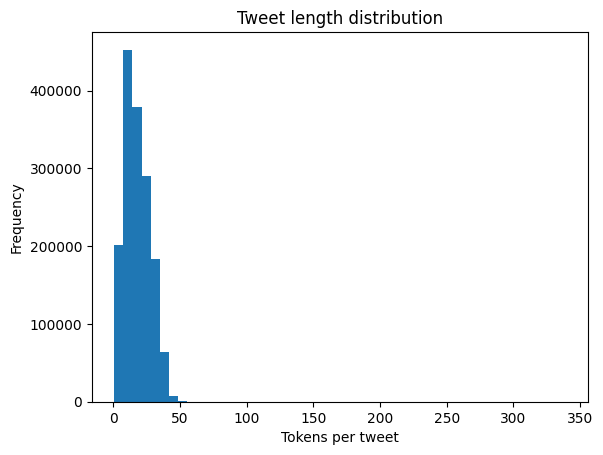

In [8]:
# Tokenize
lengths = [len(custom_tokenizer(t)) for t in df['SentimentText']]

# Summary stats
print(pd.Series(lengths).describe())

# Percentiles
for p in [90, 95, 99]:
    print(f"{p}th percentile: {np.percentile(lengths, p)} tokens")

# Plot
plt.hist(lengths, bins=50)
plt.xlabel("Tokens per tweet")
plt.ylabel("Frequency")
plt.title("Tweet length distribution")
plt.show()

In [9]:
# Padding and encoding
max_len = 34 # for custom tokenizer

def encode_tokens(tokens):
    return [word2idx.get(tok, word2idx[UNK]) for tok in tokens]

def pad_sequence(seq, max_len=max_len):
    if len(seq) >= max_len:
        return seq[:max_len]
    return seq + [word2idx[PAD]] * (max_len - len(seq))

# Train set
train_X_ids = np.array([pad_sequence(encode_tokens(toks)) for toks in train_tok])
train_y_ids = np.array(train_y)

# Test set
test_tok = [custom_tokenizer(t) for t in test_texts]
test_X_ids = np.array([pad_sequence(encode_tokens(toks)) for toks in test_tok])
test_y_ids = np.array(test_y)

print("Train X shape:", train_X_ids.shape)
print("Test X shape:", test_X_ids.shape)

Train X shape: (1262889, 34)
Test X shape: (315723, 34)


In [10]:
# Batch generator
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils import batch_iter

# Example check
batch_size = 512
for xb, yb in batch_iter(train_X_ids, train_y_ids, batch_size):
    print("Batch X shape:", xb.shape)  # (batch_size, 34)
    print("Batch y shape:", yb.shape)  # (batch_size,)
    break


Batch X shape: (512, 34)
Batch y shape: (512,)


# Modelling

## Model - Bag of words

We’ll implement:

- Embedding layer
- Average pooling (bag-of-words style)
- Dense → sigmoid for binary classification
- Training loop with cross-entropy loss

In [11]:
vocab_size = 256995 # for custom tokenizer
max_len = 34 # for custom tokenizer

In [12]:
import jax
import jax.numpy as jnp
import flax.linen as nn
import optax
from flax.training import train_state

### Flax Model

In [13]:
class Classifier(nn.Module):
    vocab_size: int
    embed_dim: int = 128
    hidden_dim_1: int = 256
    hidden_dim_2: int = 128

    @nn.compact
    def __call__(self, x):
        # x: (batch, max_len)
        emb = nn.Embed(self.vocab_size, self.embed_dim)(x)     # (batch, max_length, embed_dim)
        pooled = emb.mean(axis=1)          # simple average pooling
        h = nn.Dense(self.hidden_dim_1)(pooled)
        h = nn.relu(h)          # activation
        h = nn.Dense(self.hidden_dim_2)(pooled)
        h = nn.relu(h)
        out = nn.Dense(1)(h)
        return out.squeeze(-1)       # logits

### Training Utilities

In [14]:
from utils import binary_loss, compute_metrics

### Training Loop

In [15]:
class TrainState(train_state.TrainState):
    pass

rng = jax.random.PRNGKey(0)
model = Classifier(vocab_size=vocab_size)

params = model.init(rng, jnp.ones((1, max_len), dtype=jnp.int32))
tx = optax.adam(1e-3)
state = TrainState.create(apply_fn=model.apply, params=params, tx=tx)

@jax.jit
def train_step(state, batch_x, batch_y):
    def loss_fn(params):
        logits = state.apply_fn(params, batch_x)
        loss = binary_loss(logits, batch_y)
        return loss, logits
    grad_fn = jax.value_and_grad(loss_fn, has_aux=True)
    (loss, logits), grads = grad_fn(state.params)
    state = state.apply_gradients(grads=grads)
    metrics = compute_metrics(logits, batch_y)
    return state, loss, metrics

@jax.jit
def eval_step(state, batch_x, batch_y):
    logits = state.apply_fn(state.params, batch_x)
    metrics = compute_metrics(logits, batch_y)
    return metrics

### Run Training

In [16]:
num_epochs = 4
batch_size = 200
log_every = 1000

# summary
history = {
    "step": [],
    "epoch": [],
    "train_loss": [],
    "train_acc": [],
    "train_precision": [],
    "train_recall": [],
    "train_f1": [],
    "test_loss": [],
    "test_acc": [],
    "test_precision": [],
    "test_recall": [],
    "test_f1": [],
}

num_train_batches = int(np.ceil(len(train_X_ids) / batch_size))
num_test_batches = int(np.ceil(len(test_X_ids) / batch_size))

print(f"Total train batches per epoch: {num_train_batches}")
print(f"Total test batches per epoch: {num_test_batches}")

global_step = 0

# Running sums for cumulative averages
cumulative_train_loss = 0.0
cumulative_train_acc = 0.0
cumulative_train_pre = 0.0
cumulative_train_rec = 0.0
cumulative_train_f1 = 0.0

cumulative_test_loss = 0.0
cumulative_test_acc = 0.0
cumulative_test_pre = 0.0
cumulative_test_rec = 0.0
cumulative_test_f1 = 0.0

# create test iterator
test_iter = batch_iter(test_X_ids, test_y_ids, batch_size, shuffle=True)

for epoch in range(num_epochs):
    print(f"\n===== Epoch {epoch+1}/{num_epochs} =====")

    for i, (xb, yb) in enumerate(batch_iter(train_X_ids, train_y_ids, batch_size)):
        global_step += 1
        xb = jnp.array(xb, dtype=jnp.int32)
        yb = jnp.array(yb, dtype=jnp.float32)

        # --- Train step
        state, loss, train_m = train_step(state, xb, yb)
        train_loss = float(loss)
        train_acc = float(train_m["accuracy"])
        train_pre = float(train_m["precision"])
        train_rec = float(train_m["recall"])
        train_f1  = float(train_m["f1"])

        # --- Eval step (on a random test batch)
        try:
            test_xb, test_yb = next(test_iter)
        except StopIteration:
            test_iter = batch_iter(test_X_ids, test_y_ids, batch_size, shuffle=True)
            test_xb, test_yb = next(test_iter)

        test_xb = jnp.array(test_xb, dtype=jnp.int32)
        test_yb = jnp.array(test_yb, dtype=jnp.float32)
        logits = state.apply_fn(state.params, test_xb)
        test_loss = float(binary_loss(logits, test_yb))
        test_m = compute_metrics(logits, test_yb)
        test_acc = float(test_m["accuracy"])
        test_pre = float(test_m["precision"])
        test_rec = float(test_m["recall"])
        test_f1  = float(test_m["f1"])

        # --- Update cumulative sums
        cumulative_train_loss += train_loss
        cumulative_train_acc += train_acc
        cumulative_train_pre += train_pre
        cumulative_train_rec += train_rec
        cumulative_train_f1  += train_f1

        cumulative_test_loss += test_loss
        cumulative_test_acc += test_acc
        cumulative_test_pre += test_pre
        cumulative_test_rec += test_rec
        cumulative_test_f1  += test_f1

        # --- Compute cumulative averages
        avg_train_loss = cumulative_train_loss / global_step
        avg_train_acc  = cumulative_train_acc  / global_step
        avg_train_pre  = cumulative_train_pre  / global_step
        avg_train_rec  = cumulative_train_rec  / global_step
        avg_train_f1   = cumulative_train_f1   / global_step

        avg_test_loss = cumulative_test_loss / global_step
        avg_test_acc  = cumulative_test_acc  / global_step
        avg_test_pre  = cumulative_test_pre  / global_step
        avg_test_rec  = cumulative_test_rec  / global_step
        avg_test_f1   = cumulative_test_f1   / global_step

        # --- Logging
        if global_step % log_every == 0:
            print(f"[Epoch {epoch+1} | Batch {i+1}/{num_train_batches}] "
                  f"Train Loss: {avg_train_loss:.4f}, Acc: {avg_train_acc:.4f}, "
                  f"Pre: {avg_train_pre:.4f}, Rec: {avg_train_rec:.4f}, F1: {avg_train_f1:.4f} | "
                  f"Test Loss: {avg_test_loss:.4f}, Acc: {avg_test_acc:.4f}, "
                  f"Pre: {avg_test_pre:.4f}, Rec: {avg_test_rec:.4f}, F1: {avg_test_f1:.4f}")

        # --- Save to history
        history["step"].append(global_step)
        history["epoch"].append(epoch+1)
        history["train_loss"].append(avg_train_loss)
        history["train_acc"].append(avg_train_acc)
        history["train_precision"].append(avg_train_pre)
        history["train_recall"].append(avg_train_rec)
        history["train_f1"].append(avg_train_f1)
        history["test_loss"].append(avg_test_loss)
        history["test_acc"].append(avg_test_acc)
        history["test_precision"].append(avg_test_pre)
        history["test_recall"].append(avg_test_rec)
        history["test_f1"].append(avg_test_f1)

# ===== Final Summary =====
print("\n===== Training Summary =====")
for e in range(1, num_epochs+1):
    mask = [idx for idx, ep in enumerate(history["epoch"]) if ep == e]
    last_idx = mask[-1]  # last cumulative for this epoch
    print(f"Epoch {e}: "
          f"Train Loss {history['train_loss'][last_idx]:.4f}, "
          f"Acc {history['train_acc'][last_idx]:.4f}, "
          f"Pre {history['train_precision'][last_idx]:.4f}, "
          f"Rec {history['train_recall'][last_idx]:.4f}, "
          f"F1 {history['train_f1'][last_idx]:.4f} | "
          f"Test Loss {history['test_loss'][last_idx]:.4f}, "
          f"Acc {history['test_acc'][last_idx]:.4f}, "
          f"Pre {history['test_precision'][last_idx]:.4f}, "
          f"Rec {history['test_recall'][last_idx]:.4f}, "
          f"F1 {history['test_f1'][last_idx]:.4f}")

# Save history to CSV
history_df = pd.DataFrame(history)
history_df.to_csv("training_history.csv", index=False)
print("\nTraining history saved to training_history.csv")


Total train batches per epoch: 6315
Total test batches per epoch: 1579

===== Epoch 1/4 =====
[Epoch 1 | Batch 1000/6315] Train Loss: 0.4903, Acc: 0.7624, Pre: 0.7662, Rec: 0.7663, F1: 0.7620 | Test Loss: 0.4922, Acc: 0.7613, Pre: 0.7651, Rec: 0.7627, F1: 0.7597
[Epoch 1 | Batch 2000/6315] Train Loss: 0.4660, Acc: 0.7783, Pre: 0.7837, Rec: 0.7754, F1: 0.7768 | Test Loss: 0.4664, Acc: 0.7782, Pre: 0.7849, Rec: 0.7729, F1: 0.7761
[Epoch 1 | Batch 3000/6315] Train Loss: 0.4539, Acc: 0.7857, Pre: 0.7917, Rec: 0.7811, F1: 0.7841 | Test Loss: 0.4547, Acc: 0.7854, Pre: 0.7916, Rec: 0.7792, F1: 0.7831
[Epoch 1 | Batch 4000/6315] Train Loss: 0.4469, Acc: 0.7898, Pre: 0.7958, Rec: 0.7844, F1: 0.7881 | Test Loss: 0.4477, Acc: 0.7894, Pre: 0.7958, Rec: 0.7827, F1: 0.7872
[Epoch 1 | Batch 5000/6315] Train Loss: 0.4423, Acc: 0.7925, Pre: 0.7983, Rec: 0.7866, F1: 0.7906 | Test Loss: 0.4428, Acc: 0.7924, Pre: 0.7985, Rec: 0.7853, F1: 0.7900
[Epoch 1 | Batch 6000/6315] Train Loss: 0.4386, Acc: 0.7946, 

# Save and Load

In [20]:
import joblib
from flax import serialization

In [18]:
# Save full state (params + optimizer state + step counter)
with open("pooling_batch-200_2-hidden=256-128.msgpack", "wb") as f:
    f.write(serialization.to_bytes(state))
print("Full training state saved!")

# Load full state
with open("pooling_batch-200_2-hidden=256-128.msgpack", "rb") as f:
    state = serialization.from_bytes(state, f.read())
print("Training state fully restored!")

Full training state saved!
Training state fully restored!


In [22]:
import re
import jax
import jax.numpy as jnp
import joblib
from flax import linen as nn, serialization
from flax.training import train_state
import optax

# =========================================
# 1. Tokenizer + Encoding
# =========================================
def custom_tokenizer(text):
    text = text.lower()
    text = re.sub(r"http\S+", "<URL>", text)
    text = re.sub(r"@\w+", "<USER>", text)
    tokens = re.findall(
        r"[#@]?\w+|[:;=xX8][-^']?[)DPOp3]+|[^\w\s]", 
        text, flags=re.UNICODE
    )
    return tokens

PAD, UNK = "<PAD>", "<UNK>"

def encode_tokens(tokens, word2idx, max_len=34):
    ids = [word2idx.get(tok, word2idx[UNK]) for tok in tokens]
    if len(ids) >= max_len:
        return ids[:max_len]
    return ids + [word2idx[PAD]] * (max_len - len(ids))


# =========================================
# 3. TrainState skeleton for restoring
# =========================================
class TrainState(train_state.TrainState):
    pass


def restore_state(msgpack_path, model, vocab_size, max_len=34):
    rng = jax.random.PRNGKey(0)
    dummy = jnp.ones((1, max_len), dtype=jnp.int32)
    params = model.init(rng, dummy)["params"]

    tx = optax.adam(1e-3)  # optimizer placeholder
    state = TrainState.create(apply_fn=model.apply, params=params, tx=tx)

    with open(msgpack_path, "rb") as f:
        state = serialization.from_bytes(state, f.read())

    return state


# =========================================
# 4. Inference Pipeline
# =========================================
class InferencePipeline:
    def __init__(self, model, params, word2idx, max_len=34, threshold=0.5):
        self.model = model
        self.params = params
        self.word2idx = word2idx
        self.max_len = max_len
        self.threshold = threshold

    def preprocess(self, texts):
        tok = [custom_tokenizer(t) for t in texts]
        ids = [encode_tokens(t, self.word2idx, self.max_len) for t in tok]
        return jnp.array(ids, dtype=jnp.int32)

    def predict_proba(self, texts):
        X = self.preprocess(texts)
        logits = self.model.apply({"params": self.params}, X)
        return jax.nn.sigmoid(logits)

    def predict(self, texts):
        probs = self.predict_proba(texts)
        return (probs >= self.threshold).astype(int)

    def save(self, path):
        joblib.dump({
            "params": self.params,
            "word2idx": self.word2idx,
            "max_len": self.max_len,
            "threshold": self.threshold,
        }, path)

    @classmethod
    def load(cls, path, model):
        data = joblib.load(path)
        return cls(model, data["params"], data["word2idx"],
                   data["max_len"], data["threshold"])


# =========================================
# 5. Build Pipeline from Saved State
# =========================================
if __name__ == "__main__":
    
    # Load vocab
    word2idx = joblib.load("word2idx.joblib")
    vocab_size = len(word2idx)
    max_len = 34

    # Recreate model + restore params
    model = Classifier(vocab_size=vocab_size)

    # Build pipeline
    params = state.params["params"]   # <-- FIX: unwrap nested params
    pipeline = InferencePipeline(model, params, word2idx, max_len=max_len)
    
    # Example predictions
    texts = ["I love this movie!", "This is terrible..."]
    print("Probabilities:", pipeline.predict_proba(texts))
    print("Predictions:", pipeline.predict(texts))  # → [1, 0]

    # Save pipeline
    pipeline.save("pooling_batch-200_2-hidden=256-128_pipeline.joblib")

    # Reload pipeline
    pipeline2 = InferencePipeline.load("pooling_batch-200_2-hidden=256-128_pipeline.joblib", model)
    print("Reloaded Predictions:", pipeline2.predict(texts))


Probabilities: [0.9887927  0.01360878]
Predictions: [1 0]
Reloaded Predictions: [1 0]
